In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
df=pd.read_csv('train_wn75k28.csv')
df_test=pd.read_csv('test_Wf7sxXF.csv')

In [3]:
import datetime
df['created_at']=pd.to_datetime(df['created_at'])

In [4]:
df['created_at_month']=pd.DatetimeIndex(df['created_at']).month
df['created_at_day']=pd.DatetimeIndex(df['created_at']).day

In [5]:
df['signup_date']=pd.to_datetime(df['signup_date'])
df['signup_date'].head()

0   2020-09-24
1   2020-09-19
2   2021-08-11
3   2017-10-04
4   2020-06-08
Name: signup_date, dtype: datetime64[ns]

In [6]:
df['signup_date_year']=pd.DatetimeIndex(df['signup_date']).year
df['signup_date_month']=pd.DatetimeIndex(df['signup_date']).month
df['signup_date_day']=pd.DatetimeIndex(df['signup_date']).day   

#### Dropping created date and signup date

In [7]:
df.drop(['created_at','signup_date'],axis=1,inplace=True)

In [8]:
df.head()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,...,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,created_at_month,created_at_day,signup_date_year,signup_date_month,signup_date_day
0,1,1,2,2.0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,2020.0,9.0,24.0
1,2,2,1,2.0,1,0,1,0,0,0,...,0,0,0,0,0,1,1,2020.0,9.0,19.0
2,3,9,3,3.0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,2021.0,8.0,11.0
3,4,6,7,2.0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,2017.0,10.0,4.0
4,5,4,6,NaN,0,0,0,0,0,0,...,0,0,1,0,0,1,1,2020.0,6.0,8.0


<AxesSubplot:>

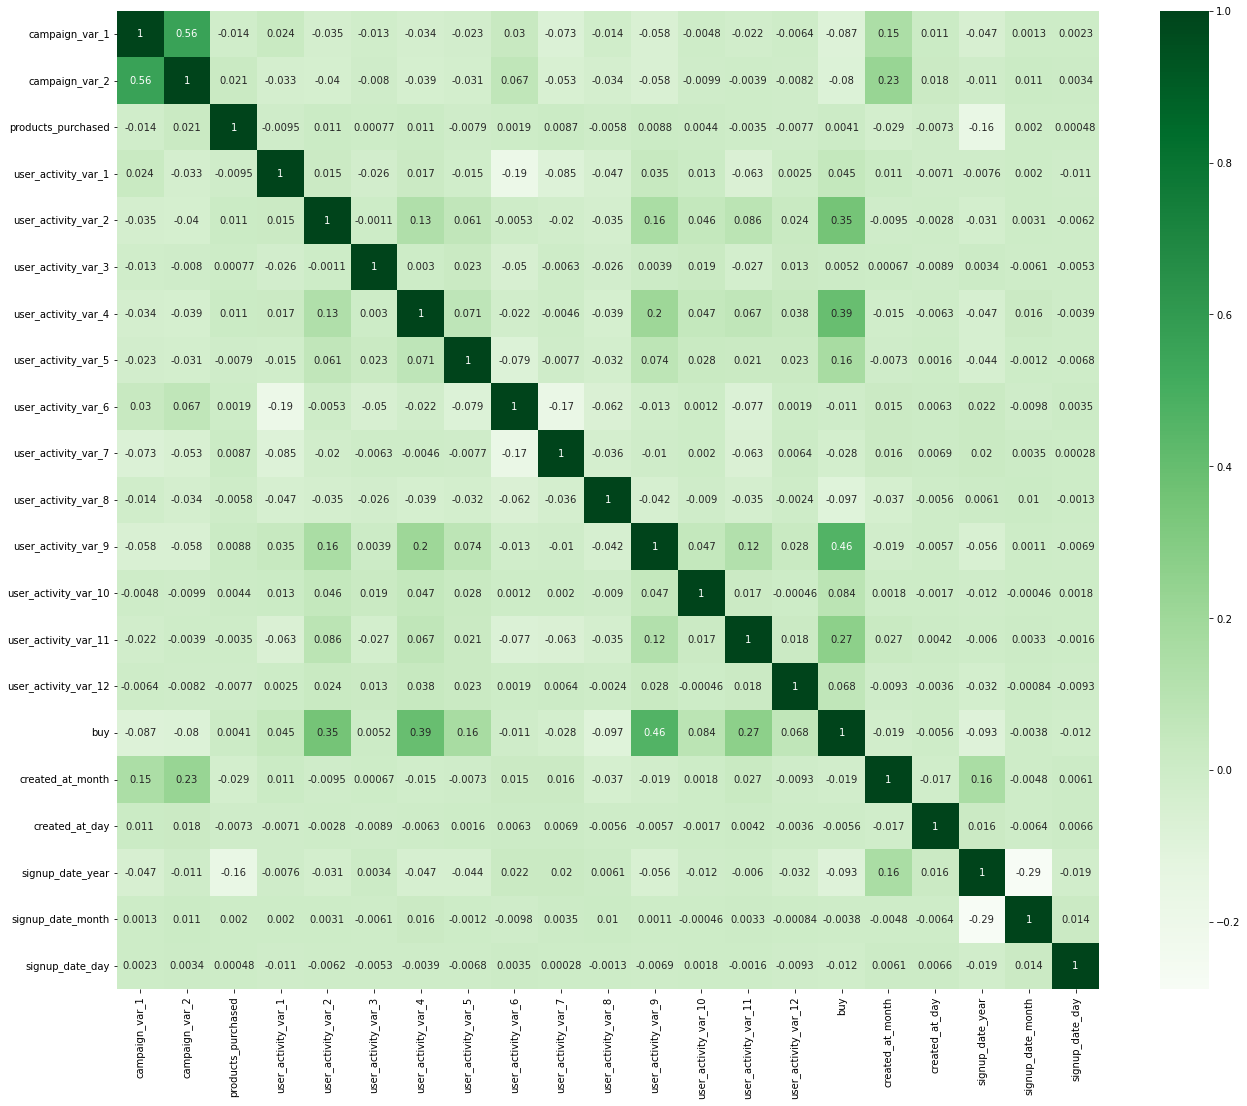

In [9]:
f, ax = plt.subplots(figsize=(22, 18)) 
sns.heatmap(df.drop('id',axis=1).corr(),cmap="Greens",annot=True)

In [10]:
df.groupby('signup_date_month')['buy'].mean()

signup_date_month
1.0     0.096229
2.0     0.085086
3.0     0.067695
4.0     0.084975
5.0     0.081402
6.0     0.081264
7.0     0.079072
8.0     0.081950
9.0     0.075442
10.0    0.085126
11.0    0.081029
12.0    0.084840
Name: buy, dtype: float64

In [11]:
df.fillna(value=0,inplace=True)

In [12]:
df.isnull().sum()

id                      0
campaign_var_1          0
campaign_var_2          0
products_purchased      0
user_activity_var_1     0
user_activity_var_2     0
user_activity_var_3     0
user_activity_var_4     0
user_activity_var_5     0
user_activity_var_6     0
user_activity_var_7     0
user_activity_var_8     0
user_activity_var_9     0
user_activity_var_10    0
user_activity_var_11    0
user_activity_var_12    0
buy                     0
created_at_month        0
created_at_day          0
signup_date_year        0
signup_date_month       0
signup_date_day         0
dtype: int64

In [13]:
X=df.drop(['id','buy'],axis=1)
y=df['buy']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=101)

#### Logistical Regression

In [16]:
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression(dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,) 
lr.fit(X_train,y_train)

C:\Users\zadea\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
from sklearn.metrics import mean_absolute_error
prediction_lr=lr.predict(X_val)

print('Mean Absolute Error: ', mean_absolute_error(y_val,prediction_lr))
print('Score', lr.score(X_val, y_val))

Mean Absolute Error:  0.05183199285075961
Score 0.9481680071492404


In [18]:
from sklearn.metrics import f1_score

In [19]:
f1_score(y_val, prediction_lr, average=None)

array([0.97313749, 0.26449275])

#### KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

 

In [21]:
X0_train, X0_val, y0_train, y0_val = train_test_split(X, y, test_size = 0.2, random_state=101)

In [22]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X0_train, y0_train)

KNeighborsClassifier(n_neighbors=3)

#### Cross Validation Score

In [23]:
from sklearn.model_selection import cross_val_score

accuracy_rate = []


for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=10)
    accuracy_rate.append(score.mean())

error_rate = []


for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X0_train,y0_train)
    pred_i = knn.predict(X0_val)
    error_rate.append(np.mean(pred_i != y0_val))

In [24]:
# Calculate the accuracy of the model
prediction_knn=knn.predict(X0_val)
print(knn.score(X0_val, y0_val))


0.9415294267841184


In [25]:
f1_score(y0_val, prediction_knn, average=None)

array([0.96984064, 0.04583333])

#### Standard Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler=StandardScaler()

In [28]:
scaled_feat=scaler.fit_transform(df.values)

In [29]:
scaled_df=pd.DataFrame(scaled_feat,index=df.index,columns=df.columns)

In [30]:
X1=scaled_df.drop(['id','buy'],axis=1)
y1=scaled_df['buy']

In [31]:
X1_train, X1_val, y1_train, y1_val = train_test_split(X1, y1, test_size=0.1, random_state=101)

#### Cat Boost Classifier

In [32]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(
    iterations=1000,
    use_best_model=True,
    eval_metric='F1',
    depth=7,
    learning_rate=0.042,
    # loss_function='CrossEntropy'
)

cb.fit(
    X_train, y_train,
    cat_features=None,
    eval_set=(X_val, y_val),
    verbose=False
)
print('Model is fitted: ' + str(cb.is_fitted()))
print('Model params:')
print(cb.get_params())

Model is fitted: True
Model params:
{'iterations': 1000, 'learning_rate': 0.042, 'depth': 7, 'use_best_model': True, 'eval_metric': 'F1'}


In [33]:
prediction_cvc=cb.predict(X_val)

In [34]:
f1_score(y_val,prediction_cvc , average=None)

array([0.98672714, 0.70430906])

#### preprocessing test file

In [35]:
df_test.columns

Index(['id', 'created_at', 'campaign_var_1', 'campaign_var_2',
       'products_purchased', 'signup_date', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12'],
      dtype='object')

In [36]:
import datetime
df_test['created_at']=pd.to_datetime(df_test['created_at'])

df_test['created_at_month']=pd.DatetimeIndex(df_test['created_at']).month
df_test['created_at_day']=pd.DatetimeIndex(df_test['created_at']).day

df_test['signup_date']=pd.to_datetime(df_test['signup_date'])
df_test['signup_date'].head()

df_test['signup_date_year']=pd.DatetimeIndex(df_test['signup_date']).year
df_test['signup_date_month']=pd.DatetimeIndex(df_test['signup_date']).month
df_test['signup_date_day']=pd.DatetimeIndex(df_test['signup_date']).day   


In [37]:
df_test.drop(['created_at','signup_date'],axis=1,inplace=True)

df_test.head()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,...,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,created_at_month,created_at_day,signup_date_year,signup_date_month,signup_date_day
0,39162,2,2,NaN,1,1,0,0,0,1,...,0,0,0,1,0,1,1,2021.0,8.0,17.0
1,39163,4,7,3.0,1,0,0,0,0,0,...,1,0,0,0,0,1,1,2020.0,5.0,21.0
2,39164,8,7,NaN,0,0,0,0,1,1,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,39165,9,8,2.0,0,0,0,0,1,1,...,0,0,0,2,0,1,1,2020.0,6.0,22.0
4,39166,4,5,2.0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,2021.0,3.0,10.0


### creating submission file

In [132]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(cb.predict(df_test))
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['id'],pred],axis=1)
datasets.columns=['id','buy']
datasets.to_csv('sample_submission.csv',index=False)